# Work
請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [22]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [23]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [24]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [25]:
"""Code Here
建立你的神經網路
"""
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [26]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [27]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.9356 - accuracy: 0.3025 - val_loss: 1.7492 - val_accuracy: 0.3744
Epoch 2/500
50000/50000 [==============================] - 6s 128us/step - loss: 1.7011 - accuracy: 0.3923 - val_loss: 1.6428 - val_accuracy: 0.4100
Epoch 3/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.6145 - accuracy: 0.4225 - val_loss: 1.6464 - val_accuracy: 0.4171
Epoch 4/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.5460 - accuracy: 0.4491 - val_loss: 1.5269 - val_accuracy: 0.4513
Epoch 5/500
50000/50000 [==============================] - 7s 148us/step - loss: 1.5014 - accuracy: 0.4651 - val_loss: 1.5031 - val_accuracy: 0.4634
Epoch 6/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.4608 - accuracy: 0.4766 - val_loss: 1.5199 - val_accuracy: 0.4511
Epoch 7/500
50000/50000 [==============================]

50000/50000 [==============================] - 6s 126us/step - loss: 0.5943 - accuracy: 0.7872 - val_loss: 1.9259 - val_accuracy: 0.5106
Epoch 56/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.5743 - accuracy: 0.7948 - val_loss: 1.9391 - val_accuracy: 0.5123
Epoch 57/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.5718 - accuracy: 0.7936 - val_loss: 1.9959 - val_accuracy: 0.5129
Epoch 58/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.5607 - accuracy: 0.8005 - val_loss: 1.9942 - val_accuracy: 0.5153
Epoch 59/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.5521 - accuracy: 0.8005 - val_loss: 1.9950 - val_accuracy: 0.5111
Epoch 60/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.5365 - accuracy: 0.8064 - val_loss: 2.0763 - val_accuracy: 0.5135
Epoch 61/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.5451 - accuracy: 0.8052 - val

50000/50000 [==============================] - 6s 125us/step - loss: 0.2696 - accuracy: 0.9030 - val_loss: 3.3707 - val_accuracy: 0.5014
Epoch 110/500
50000/50000 [==============================] - 6s 123us/step - loss: 0.2681 - accuracy: 0.9039 - val_loss: 3.5337 - val_accuracy: 0.4993
Epoch 111/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.2726 - accuracy: 0.9015 - val_loss: 3.4979 - val_accuracy: 0.4989
Epoch 112/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.2790 - accuracy: 0.8992 - val_loss: 3.5571 - val_accuracy: 0.4884
Epoch 113/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.2396 - accuracy: 0.9130 - val_loss: 3.6508 - val_accuracy: 0.4997
Epoch 114/500
50000/50000 [==============================] - 6s 125us/step - loss: 0.2645 - accuracy: 0.9060 - val_loss: 3.6264 - val_accuracy: 0.4935
Epoch 115/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.2609 - accuracy: 0.9063

50000/50000 [==============================] - 7s 136us/step - loss: 0.1601 - accuracy: 0.9435 - val_loss: 4.8135 - val_accuracy: 0.4832
Epoch 164/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.1991 - accuracy: 0.9291 - val_loss: 4.8416 - val_accuracy: 0.4909
Epoch 165/500
50000/50000 [==============================] - 6s 128us/step - loss: 0.2349 - accuracy: 0.9171 - val_loss: 4.7949 - val_accuracy: 0.4863
Epoch 166/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.2109 - accuracy: 0.9251 - val_loss: 4.7108 - val_accuracy: 0.4880
Epoch 167/500
50000/50000 [==============================] - 6s 128us/step - loss: 0.1914 - accuracy: 0.9323 - val_loss: 4.7739 - val_accuracy: 0.4857
Epoch 168/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.1615 - accuracy: 0.9434 - val_loss: 4.9082 - val_accuracy: 0.4967
Epoch 169/500
50000/50000 [==============================] - 6s 128us/step - loss: 0.1854 - accuracy: 0.9334

50000/50000 [==============================] - 6s 128us/step - loss: 0.0990 - accuracy: 0.9647 - val_loss: 5.7191 - val_accuracy: 0.4927
Epoch 218/500
50000/50000 [==============================] - 6s 128us/step - loss: 0.1889 - accuracy: 0.9336 - val_loss: 5.6544 - val_accuracy: 0.4928
Epoch 219/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.1654 - accuracy: 0.9444 - val_loss: 5.6905 - val_accuracy: 0.4935
Epoch 220/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.1177 - accuracy: 0.9584 - val_loss: 5.6825 - val_accuracy: 0.4957
Epoch 221/500
50000/50000 [==============================] - 6s 128us/step - loss: 0.0986 - accuracy: 0.9647 - val_loss: 5.8967 - val_accuracy: 0.4880
Epoch 222/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.2191 - accuracy: 0.9266 - val_loss: 5.7170 - val_accuracy: 0.4861
Epoch 223/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.2019 - accuracy: 0.9318

50000/50000 [==============================] - 6s 128us/step - loss: 0.0636 - accuracy: 0.9781 - val_loss: 6.5252 - val_accuracy: 0.4933
Epoch 272/500
50000/50000 [==============================] - 6s 128us/step - loss: 0.0658 - accuracy: 0.9774 - val_loss: 6.5919 - val_accuracy: 0.4907
Epoch 273/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.1540 - accuracy: 0.9478 - val_loss: 6.2684 - val_accuracy: 0.4893
Epoch 274/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.1893 - accuracy: 0.9386 - val_loss: 6.2712 - val_accuracy: 0.4824
Epoch 275/500
50000/50000 [==============================] - 6s 128us/step - loss: 0.1051 - accuracy: 0.9644 - val_loss: 6.4560 - val_accuracy: 0.4902
Epoch 276/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.1615 - accuracy: 0.9446 - val_loss: 6.4234 - val_accuracy: 0.4922
Epoch 277/500
50000/50000 [==============================] - 6s 130us/step - loss: 0.1346 - accuracy: 0.9538

50000/50000 [==============================] - 7s 131us/step - loss: 0.1446 - accuracy: 0.9516 - val_loss: 6.9746 - val_accuracy: 0.4919
Epoch 326/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.1559 - accuracy: 0.9502 - val_loss: 6.8615 - val_accuracy: 0.4968
Epoch 327/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.0750 - accuracy: 0.9740 - val_loss: 6.9664 - val_accuracy: 0.4915
Epoch 328/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.0706 - accuracy: 0.9754 - val_loss: 7.0500 - val_accuracy: 0.4912
Epoch 329/500
50000/50000 [==============================] - 6s 128us/step - loss: 0.0823 - accuracy: 0.9719 - val_loss: 7.0881 - val_accuracy: 0.4910
Epoch 330/500
50000/50000 [==============================] - 6s 128us/step - loss: 0.1710 - accuracy: 0.9443 - val_loss: 6.7323 - val_accuracy: 0.4901
Epoch 331/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.1351 - accuracy: 0.9550

50000/50000 [==============================] - 6s 127us/step - loss: 0.0614 - accuracy: 0.9789 - val_loss: 7.4033 - val_accuracy: 0.4837
Epoch 380/500
50000/50000 [==============================] - 6s 130us/step - loss: 0.0790 - accuracy: 0.9730 - val_loss: 7.3084 - val_accuracy: 0.4883
Epoch 381/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.0341 - accuracy: 0.9886 - val_loss: 7.6068 - val_accuracy: 0.4935
Epoch 382/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.0358 - accuracy: 0.9880 - val_loss: 7.4938 - val_accuracy: 0.4907
Epoch 383/500
50000/50000 [==============================] - 7s 130us/step - loss: 0.2328 - accuracy: 0.9306 - val_loss: 7.4292 - val_accuracy: 0.4876
Epoch 384/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.1498 - accuracy: 0.9517 - val_loss: 7.4095 - val_accuracy: 0.4848
Epoch 385/500
50000/50000 [==============================] - 6s 130us/step - loss: 0.0707 - accuracy: 0.9762

50000/50000 [==============================] - 6s 129us/step - loss: 0.0201 - accuracy: 0.9948 - val_loss: 7.0298 - val_accuracy: 0.4960
Epoch 434/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.1130 - accuracy: 0.9632 - val_loss: 6.9226 - val_accuracy: 0.4843
Epoch 435/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.2337 - accuracy: 0.9313 - val_loss: 7.0087 - val_accuracy: 0.4909
Epoch 436/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.0746 - accuracy: 0.9753 - val_loss: 7.0039 - val_accuracy: 0.4869
Epoch 437/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.0381 - accuracy: 0.9882 - val_loss: 7.2266 - val_accuracy: 0.4942
Epoch 438/500
50000/50000 [==============================] - 6s 128us/step - loss: 0.0227 - accuracy: 0.9935 - val_loss: 7.2963 - val_accuracy: 0.4955
Epoch 439/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.0364 - accuracy: 0.9876

50000/50000 [==============================] - 7s 130us/step - loss: 0.0040 - accuracy: 0.9999 - val_loss: 6.9204 - val_accuracy: 0.4988
Epoch 488/500
50000/50000 [==============================] - 6s 128us/step - loss: 0.0036 - accuracy: 0.9999 - val_loss: 7.0414 - val_accuracy: 0.4983
Epoch 489/500
50000/50000 [==============================] - 7s 130us/step - loss: 0.0033 - accuracy: 0.9999 - val_loss: 7.0378 - val_accuracy: 0.4977
Epoch 490/500
50000/50000 [==============================] - 7s 130us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 7.1479 - val_accuracy: 0.4997
Epoch 491/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.0030 - accuracy: 0.9999 - val_loss: 7.2130 - val_accuracy: 0.4980
Epoch 492/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.5811 - accuracy: 0.8811 - val_loss: 5.7465 - val_accuracy: 0.4689
Epoch 493/500
50000/50000 [==============================] - 6s 130us/step - loss: 0.2989 - accuracy: 0.9106

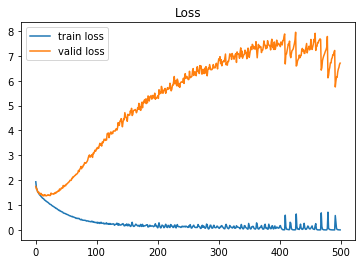

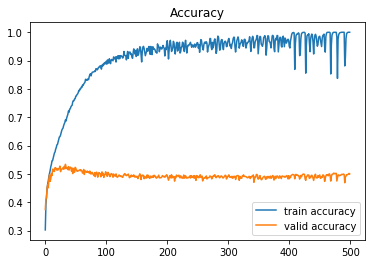

In [28]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [29]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.sgd(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [30]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 99us/step - loss: 2.2428 - accuracy: 0.1846 - val_loss: 2.1966 - val_accuracy: 0.2185
Epoch 2/500
50000/50000 [==============================] - 5s 100us/step - loss: 2.1640 - accuracy: 0.2350 - val_loss: 2.1367 - val_accuracy: 0.2468
Epoch 3/500
50000/50000 [==============================] - 5s 98us/step - loss: 2.1108 - accuracy: 0.2561 - val_loss: 2.0890 - val_accuracy: 0.2680loss: 2.1109 - accuracy: 0.25
Epoch 4/500
50000/50000 [==============================] - 5s 97us/step - loss: 2.0678 - accuracy: 0.2711 - val_loss: 2.0502 - val_accuracy: 0.2848
Epoch 5/500
50000/50000 [==============================] - 5s 98us/step - loss: 2.0327 - accuracy: 0.2841 - val_loss: 2.0183 - val_accuracy: 0.2958
Epoch 6/500
50000/50000 [==============================] - 5s 97us/step - loss: 2.0034 - accuracy: 0.2969 - val_loss: 1.9915 - val_accuracy: 0.3066ss: 2.005 - ETA: 0s - loss: 2.003

Epoch 55/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.6482 - accuracy: 0.4241 - val_loss: 1.6579 - val_accuracy: 0.4203
Epoch 56/500
50000/50000 [==============================] - 5s 92us/step - loss: 1.6450 - accuracy: 0.4259 - val_loss: 1.6550 - val_accuracy: 0.4213
Epoch 57/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.6416 - accuracy: 0.4257 - val_loss: 1.6494 - val_accuracy: 0.4243
Epoch 58/500
50000/50000 [==============================] - 5s 93us/step - loss: 1.6387 - accuracy: 0.4278 - val_loss: 1.6495 - val_accuracy: 0.4229
Epoch 59/500
50000/50000 [==============================] - 5s 94us/step - loss: 1.6356 - accuracy: 0.4272 - val_loss: 1.6463 - val_accuracy: 0.4216
Epoch 60/500
50000/50000 [==============================] - 5s 93us/step - loss: 1.6324 - accuracy: 0.4306 - val_loss: 1.6413 - val_accuracy: 0.4245
Epoch 61/500
50000/50000 [==============================] - 5s 92us/step - loss: 1.6294 - accuracy: 0.4308

Epoch 110/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.5138 - accuracy: 0.4727 - val_loss: 1.5425 - val_accuracy: 0.4587
Epoch 111/500
50000/50000 [==============================] - 5s 94us/step - loss: 1.5119 - accuracy: 0.4746 - val_loss: 1.5386 - val_accuracy: 0.4570
Epoch 112/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.5103 - accuracy: 0.4747 - val_loss: 1.5391 - val_accuracy: 0.4618
Epoch 113/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.5079 - accuracy: 0.4752 - val_loss: 1.5362 - val_accuracy: 0.4597
Epoch 114/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.5061 - accuracy: 0.4745 - val_loss: 1.5337 - val_accuracy: 0.4637
Epoch 115/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.5042 - accuracy: 0.4771 - val_loss: 1.5336 - val_accuracy: 0.4613
Epoch 116/500
50000/50000 [==============================] - 5s 94us/step - loss: 1.5025 - accuracy:

50000/50000 [==============================] - 5s 95us/step - loss: 1.4219 - accuracy: 0.5033 - val_loss: 1.4732 - val_accuracy: 0.4809
Epoch 165/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.4201 - accuracy: 0.5047 - val_loss: 1.4761 - val_accuracy: 0.4816
Epoch 166/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.4185 - accuracy: 0.5049 - val_loss: 1.4737 - val_accuracy: 0.4809
Epoch 167/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.4172 - accuracy: 0.5056 - val_loss: 1.4741 - val_accuracy: 0.4828
Epoch 168/500
50000/50000 [==============================] - 5s 94us/step - loss: 1.4155 - accuracy: 0.5055 - val_loss: 1.4681 - val_accuracy: 0.4809
Epoch 169/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.4140 - accuracy: 0.5054 - val_loss: 1.4684 - val_accuracy: 0.4848
Epoch 170/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.4128 - accuracy: 0.5069 - val_

50000/50000 [==============================] - 5s 97us/step - loss: 1.3470 - accuracy: 0.5281 - val_loss: 1.4393 - val_accuracy: 0.4899
Epoch 218/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.3456 - accuracy: 0.5292 - val_loss: 1.4293 - val_accuracy: 0.4956
Epoch 219/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.3444 - accuracy: 0.5297 - val_loss: 1.4231 - val_accuracy: 0.4962
Epoch 220/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.3431 - accuracy: 0.5313 - val_loss: 1.4222 - val_accuracy: 0.4955 3s - loss: 1.3468 - accuracy - ETA: 3s - loss: 1.3
Epoch 221/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.3416 - accuracy: 0.5305 - val_loss: 1.4279 - val_accuracy: 0.4966
Epoch 222/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.3407 - accuracy: 0.5309 - val_loss: 1.4310 - val_accuracy: 0.4906
Epoch 223/500
50000/50000 [==============================] - 5s

50000/50000 [==============================] - 5s 94us/step - loss: 1.2823 - accuracy: 0.5513 - val_loss: 1.4005 - val_accuracy: 0.5021
Epoch 271/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.2818 - accuracy: 0.5504 - val_loss: 1.3919 - val_accuracy: 0.5074
Epoch 272/500
50000/50000 [==============================] - 5s 94us/step - loss: 1.2800 - accuracy: 0.5509 - val_loss: 1.4092 - val_accuracy: 0.5025
Epoch 273/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.2793 - accuracy: 0.5516 - val_loss: 1.4113 - val_accuracy: 0.5018
Epoch 274/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.2783 - accuracy: 0.5512 - val_loss: 1.3948 - val_accuracy: 0.5084
Epoch 275/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.2765 - accuracy: 0.5529 - val_loss: 1.3890 - val_accuracy: 0.5084
Epoch 276/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.2760 - accuracy: 0.5514 - val_

50000/50000 [==============================] - 5s 95us/step - loss: 1.2247 - accuracy: 0.5702 - val_loss: 1.3639 - val_accuracy: 0.5167
Epoch 324/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.2220 - accuracy: 0.5722 - val_loss: 1.3811 - val_accuracy: 0.5133
Epoch 325/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.2211 - accuracy: 0.5716 - val_loss: 1.3662 - val_accuracy: 0.5160
Epoch 326/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.2203 - accuracy: 0.5710 - val_loss: 1.3609 - val_accuracy: 0.5164
Epoch 327/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.2179 - accuracy: 0.5730 - val_loss: 1.3839 - val_accuracy: 0.5081
Epoch 328/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.2186 - accuracy: 0.5731 - val_loss: 1.3677 - val_accuracy: 0.5162
Epoch 329/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.2172 - accuracy: 0.5727 - val_

50000/50000 [==============================] - 5s 95us/step - loss: 1.1673 - accuracy: 0.5890 - val_loss: 1.3486 - val_accuracy: 0.5263
Epoch 378/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.1650 - accuracy: 0.5909 - val_loss: 1.3505 - val_accuracy: 0.5273
Epoch 379/500
50000/50000 [==============================] - 5s 94us/step - loss: 1.1644 - accuracy: 0.5898 - val_loss: 1.3511 - val_accuracy: 0.5258
Epoch 380/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.1638 - accuracy: 0.5901 - val_loss: 1.3782 - val_accuracy: 0.5156
Epoch 381/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.1623 - accuracy: 0.5906 - val_loss: 1.3672 - val_accuracy: 0.5179
Epoch 382/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.1615 - accuracy: 0.5903 - val_loss: 1.3687 - val_accuracy: 0.5192
Epoch 383/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.1599 - accuracy: 0.5924 - val_

50000/50000 [==============================] - 5s 96us/step - loss: 1.1122 - accuracy: 0.6099 - val_loss: 1.3594 - val_accuracy: 0.5201
Epoch 431/500
50000/50000 [==============================] - 5s 94us/step - loss: 1.1103 - accuracy: 0.6102 - val_loss: 1.3571 - val_accuracy: 0.5170
Epoch 432/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.1106 - accuracy: 0.6106 - val_loss: 1.3796 - val_accuracy: 0.5149
Epoch 433/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.1114 - accuracy: 0.6092 - val_loss: 1.4043 - val_accuracy: 0.5129
Epoch 434/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.1065 - accuracy: 0.6118 - val_loss: 1.3911 - val_accuracy: 0.5104
Epoch 435/500
50000/50000 [==============================] - 5s 94us/step - loss: 1.1073 - accuracy: 0.6118 - val_loss: 1.3487 - val_accuracy: 0.5242
Epoch 436/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.1068 - accuracy: 0.6123 - val_

50000/50000 [==============================] - 6s 113us/step - loss: 1.0588 - accuracy: 0.6281 - val_loss: 1.3377 - val_accuracy: 0.5281
Epoch 485/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.0605 - accuracy: 0.6269 - val_loss: 1.3722 - val_accuracy: 0.5147
Epoch 486/500
50000/50000 [==============================] - 5s 93us/step - loss: 1.0541 - accuracy: 0.6295 - val_loss: 1.3624 - val_accuracy: 0.5268
Epoch 487/500
50000/50000 [==============================] - 4s 89us/step - loss: 1.0597 - accuracy: 0.6280 - val_loss: 1.3921 - val_accuracy: 0.5135
Epoch 488/500
50000/50000 [==============================] - 5s 92us/step - loss: 1.0540 - accuracy: 0.6300 - val_loss: 1.3331 - val_accuracy: 0.5304
Epoch 489/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.0564 - accuracy: 0.6292 - val_loss: 1.3532 - val_accuracy: 0.5202
Epoch 490/500
50000/50000 [==============================] - 4s 90us/step - loss: 1.0527 - accuracy: 0.6307 - val

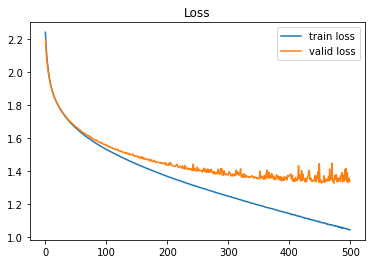

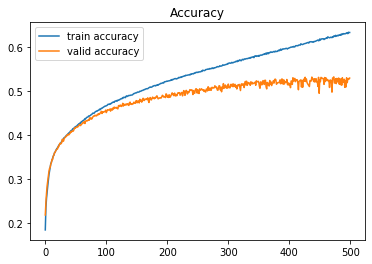

In [31]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [ ]:
Ans:
    由上述實驗數據可知Adam演算法對於訓練集數據表現精確度最高達到100%,但sgd演算法對於控制模型過擬和問題及模型表現明顯優於Adam.

資料來源：https://blog.csdn.net/qq_35860352/article/details/80772142